=== Evaluation Metrics ===
Accuracy : 0.94
Precision: 1.00
Recall   : 0.70
F1 Score : 0.82
AUC      : 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       249
           1       1.00      0.70      0.82        60

    accuracy                           0.94       309
   macro avg       0.97      0.85      0.89       309
weighted avg       0.95      0.94      0.94       309



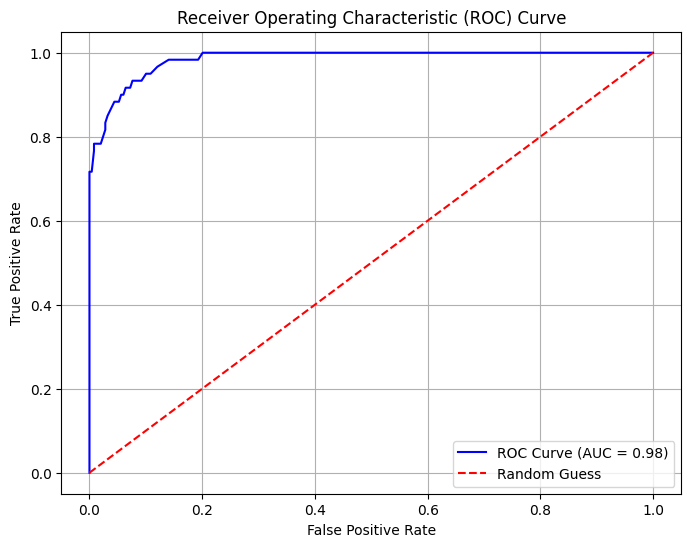

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Membaca file CSV
file_path = 'MaterialStrength.csv'
data = pd.read_csv(file_path)

# Menangani nilai yang tidak konsisten dalam target
data['target_feature'] = data['target_feature'].astype(str).str.strip().str.lower()

# Mengubah target ke dalam bentuk biner (misalnya >50 menjadi 1, <=50 menjadi 0)
data['target_feature'] = np.where(data['target_feature'].astype(float) > 50, 1, 0)

# Membagi fitur dan target
X = data.drop(columns=['target_feature'])
y = data['target_feature']

# Encoding data kategoris (jika ada)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model klasifikasi (Random Forest sebagai contoh)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Menampilkan hasil
print("=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Membuat kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
